In [ ]:
# EV Data Wrangling

**Dataset source:** https://www.kaggle.com/datasets/urvishahir/electric-vehicle-specifications-dataset-2025  

This script explores the electric vehicle dataset step by step,  
with commentary to show the reasoning process behind each check.

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

# --- Load data ---
csv_path = Path(r"C:\Users\teren\OneDrive\Documents\Education\05._Continued Education\01._SpringBoard Data Science Bootcamp\03._Capstone Project\EV_Project\02._Data\electric_vehicles_spec_2025.csv.csv")
df = pd.read_csv(csv_path)

print("Shape:", df.shape)
print(df.head())

Shape: (478, 22)
    brand                model  top_speed_kmh  battery_capacity_kWh  \
0  Abarth     500e Convertible            155                  37.8   
1  Abarth       500e Hatchback            155                  37.8   
2  Abarth  600e Scorpionissima            200                  50.8   
3  Abarth         600e Turismo            200                  50.8   
4  Aiways                   U5            150                  60.0   

  battery_type  number_of_cells  torque_nm  efficiency_wh_per_km  range_km  \
0  Lithium-ion            192.0      235.0                   156       225   
1  Lithium-ion            192.0      235.0                   149       225   
2  Lithium-ion            102.0      345.0                   158       280   
3  Lithium-ion            102.0      345.0                   158       280   
4  Lithium-ion              NaN      310.0                   156       315   

   acceleration_0_100_s  ...  towing_capacity_kg cargo_volume_l  seats  \
0            

In [5]:
## Model Column Sanity
# - One row is blank, leaving 477 unique values from 478 total.
# - The "Firefly" appears only once, rare entries like this risk slowing analysis and can be dropped.

mask = (
    df['brand'].astype(str).str.strip().str.lower() == "firefly"
) & (
    df['model'].isna() | (df['model'].astype(str).str.strip() == "")
)

before = len(df)
df = df[~mask].copy()
print(f"Dropped Firefly rows with no model: {before - len(df)}")

Dropped Firefly rows with no model: 0


count    478.000000
mean     185.487448
std       34.252773
min      125.000000
25%      160.000000
50%      180.000000
75%      201.000000
max      325.000000
Name: top_speed_kmh, dtype: float64
Highest top speed: 325
        brand                model  top_speed_kmh
211  Maserati  GranTurismo Folgore            325
count    478.000000
mean     185.487448
std       34.252773
min      125.000000
25%      160.000000
50%      180.000000
75%      201.000000
max      325.000000
Name: top_speed_kmh, dtype: float64


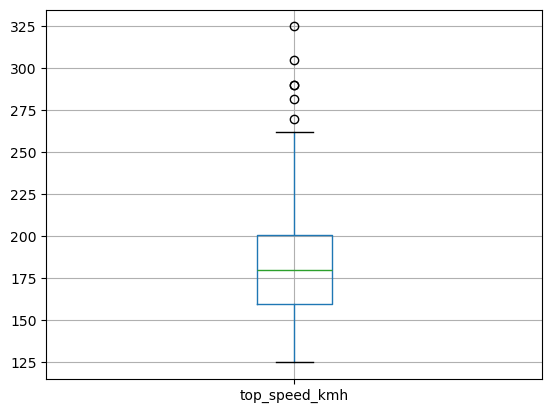

In [2]:
## Top Speed
# - Range goes from 125 km/h to 325 km/h.
# - That 325 is very high, but it belongs to a Maserati GranTurismo Folgore.
# - Cross-checking shows this is realistic, so it should be kept.

print(df['top_speed_kmh'].describe())
print("Highest top speed:", df['top_speed_kmh'].max())
print(df.loc[df['top_speed_kmh'] == df['top_speed_kmh'].max(), ['brand','model','top_speed_kmh']])

print(df['top_speed_kmh'].describe())
df[['top_speed_kmh']].boxplot()
plt.show()

count    478.000000
mean     393.179916
std      103.287335
min      135.000000
25%      320.000000
50%      397.500000
75%      470.000000
max      685.000000
Name: range_km, dtype: float64
             brand                            model  range_km
239  Mercedes-Benz                         EQS 450+       685
194          Lucid                Air Grand Touring       665
238  Mercedes-Benz                   EQS 450 4MATIC       655
240  Mercedes-Benz                   EQS 500 4MATIC       640
241  Mercedes-Benz                   EQS 580 4MATIC       640
14            Audi  A6 Sportback e-tron performance       610
15            Audi      A6 Sportback e-tron quattro       590
242  Mercedes-Benz               EQS AMG 53 4MATIC+       585
196          Lucid                      Air Touring       580
11            Audi      A6 Avant e-tron performance       575
count    478.000000
mean     393.179916
std      103.287335
min      135.000000
25%      320.000000
50%      397.500000
75%    

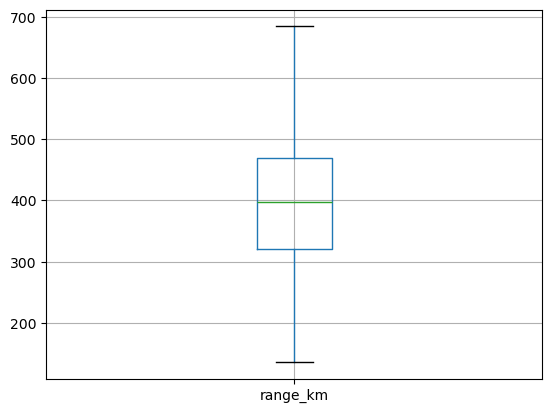

In [3]:
## Range
# - Max range = 685 km. Manufacturer sites list slightly lower values, but still within reason.
# - The top 10 models show gradual decreases, so we will keep them all.

print(df['range_km'].describe())
print(df.nlargest(10, 'range_km')[['brand','model','range_km']])

print(df['range_km'].describe())
df[['range_km']].boxplot()
plt.show()

In [10]:
## Battery, Fast Charging, Efficiency
# - battery_capacity_kWh: no missing values
# - fast_charging_power_kw_dc: 0.21% missing (Renault 5 E-Tech 40kWh). This lone row can be dropped.
# - efficiency_wh_per_km: 0% missing

for col in ['battery_capacity_kWh','fast_charging_power_kw_dc','efficiency_wh_per_km']:
    missing_count = df[col].isna().sum()
    missing_pct = df[col].isna().mean()*100
    print(col, 'missing:', missing_count, f"({missing_pct:.2f}%)")

battery_capacity_kWh missing: 0 (0.00%)
fast_charging_power_kw_dc missing: 1 (0.21%)
efficiency_wh_per_km missing: 0 (0.00%)


Dropped Renault 5 E-Tech 40kWh 95hp rows: 1
count    477.000000
mean      74.115094
std       20.292372
min       21.300000
25%       60.000000
50%       76.500000
75%       90.600000
max      118.000000
Name: battery_capacity_kWh, dtype: float64


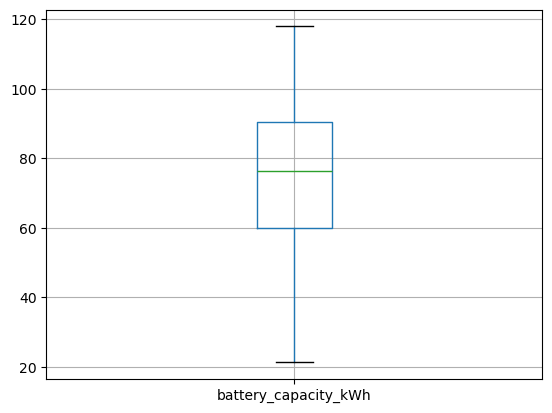

In [4]:
## Drop Renault 5 E-Tech 40kWh Row
# - This row is the only one with missing fast-charging info (0.21%).
# - Instead of guessing, drop it.

mask = (
    df['brand'].astype(str).str.strip().str.lower() == "renault"
) & (
    df['model'].astype(str).str.strip().str.lower() == "5 e-tech 40kwh 95hp"
)

before = len(df)
df = df[~mask].copy()
print(f"Dropped Renault 5 E-Tech 40kWh 95hp rows: {before - len(df)}")

print(df['battery_capacity_kWh'].describe())
df[['battery_capacity_kWh']].boxplot()
plt.show()

In [14]:
## Towing Capacity
# - Missing ~5.44% - this is significant, meaning we may need imputation or exclusion,
#   depending on how central it is to the modeling.
# - NOTE: Since towing capacity has gaps, we can use cargo_volume_l as a similar benchmark for vehicle utility.

print("Towing missing %:", df['towing_capacity_kg'].isna().mean() * 100)

Towing missing %: 5.46218487394958


Non-numeric and blank cargo_volume_l rows dropped. New shape: (473, 22)
count     473.000000
mean      494.215645
std       187.043818
min       151.000000
25%       385.000000
50%       470.000000
75%       545.000000
max      1410.000000
Name: cargo_volume_l, dtype: float64


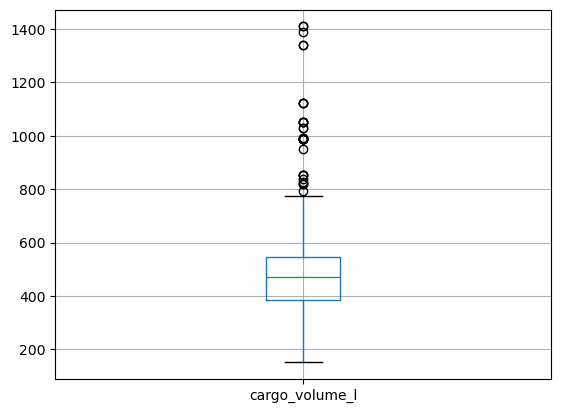

In [5]:
## Cargo Volume
# - Only 0.21% missing, but 4 rows are non-numeric (e.g., "10 Banana Boxes", "31 Banana Boxes").
# - These are clearly errors and best removed - no guessing.

cargo_numeric = pd.to_numeric(df['cargo_volume_l'], errors='coerce')
df = df[~cargo_numeric.isna()].copy()
df['cargo_volume_l'] = cargo_numeric[~cargo_numeric.isna()]
print("Non-numeric and blank cargo_volume_l rows dropped. New shape:", df.shape)

print(df['cargo_volume_l'].describe())
df[['cargo_volume_l']].boxplot()
plt.show()

count     473.000000
mean     1887.052854
std        73.659226
min      1610.000000
25%      1849.000000
50%      1890.000000
75%      1939.000000
max      2080.000000
Name: width_mm, dtype: float64


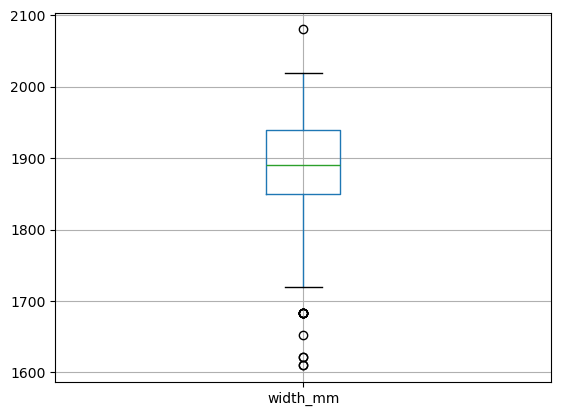

In [6]:
## Width (mm)
# - All values are tightly clustered between ~1400-2200 mm, with no missing entries.
# - This is a solid variable for analysis.

print(df['width_mm'].describe())
df[['width_mm']].boxplot()
plt.show()

In [8]:
# Check for duplicates

duplicates = df[df.duplicated()]
print(f"Number of duplicate rows: {len(duplicates)}")
print(duplicates.head())


Number of duplicate rows: 0
Empty DataFrame
Columns: [brand, model, top_speed_kmh, battery_capacity_kWh, battery_type, number_of_cells, torque_nm, efficiency_wh_per_km, range_km, acceleration_0_100_s, fast_charging_power_kw_dc, fast_charge_port, towing_capacity_kg, cargo_volume_l, seats, drivetrain, segment, length_mm, width_mm, height_mm, car_body_type, source_url]
Index: []

[0 rows x 22 columns]


In [ ]:
## Final Note
The only columns with incomplete information (blank cells) are **number_of_cells** and **towing_capacity_kg**.  
They will remain in the dataset for now but may be removed during further exploratory data analysis.

In [19]:
out_path = csv_path.with_name(csv_path.stem.replace('.csv','') + '_CLEAN.csv')
df.to_csv(out_path, index=False)

print("Saved cleaned data to:", out_path)

Saved cleaned data to: C:\Users\teren\OneDrive\Documents\Education\05._Continued Education\01._SpringBoard Data Science Bootcamp\03._Capstone Project\EV_Project\02._Data\electric_vehicles_spec_2025_CLEAN.csv
